In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read the data
customer_df = pd.read_csv('customer_value_analysis.csv')

# inspect the dataframe

customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# show more info for the dataframe

display(customer_df.shape)
customer_df.info()

(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
# rename the columns using the snake system

customer_df.columns = [col.lower().replace(' ', '_') for col in customer_df.columns]

In [5]:
# change eff_date to DateTime format

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


In [6]:
# verify chnage

display(customer_df.dtypes)

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [7]:
# look for columns with null values

display(customer_df.isnull().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [8]:
# this function splits our dataframe into 2 frames with numerical and categorgial
def split_dataframe(df):
    numerics = ['int64', 'float64']
    numerical_df = df.select_dtypes(include=numerics)
    categorical_df = df.select_dtypes(exclude=numerics)
    return numerical_df, categorical_df

numerical_df, categorical_df = split_dataframe(customer_df)


In [9]:
# drop id columns
if 'id' in numerical_df.columns:
    numerical_df = numerical_df.drop(columns='id')

if 'id' in categorical_df.columns:
    categorical_df = categorical_df.drop(columns='id')


In [10]:
display(categorical_df.head)

<bound method NDFrame.head of      customer       state response  coverage education effective_to_date  \
0     BU79786  Washington       No     Basic  Bachelor        2011-02-24   
1     QZ44356     Arizona       No  Extended  Bachelor        2011-01-31   
2     AI49188      Nevada       No   Premium  Bachelor        2011-02-19   
3     WW63253  California       No     Basic  Bachelor        2011-01-20   
4     HB64268  Washington       No     Basic  Bachelor        2011-02-03   
...       ...         ...      ...       ...       ...               ...   
9129  LA72316  California       No     Basic  Bachelor        2011-02-10   
9130  PK87824  California      Yes  Extended   College        2011-02-12   
9131  TD14365  California       No  Extended  Bachelor        2011-02-06   
9132  UP19263  California       No  Extended   College        2011-02-03   
9133  Y167826  California       No  Extended   College        2011-02-14   

     employmentstatus gender location_code marital_status

In [11]:
# shoe the correlation
correlation_matrix = numerical_df.corr()
display(correlation_matrix)

# pair with highest correlation
high_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().iloc[1]
display(high_corr)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


0.6320166625194117

Total claim amount and monthly auto premium has the highest correlation which makes sense since the customers that have claimed more would pay higher premia.

In [15]:
# function to create continuous/discrete from numerical column

def numerical_split(df, unique_threshold=36):
    
    '''this function takes a pandas DataFrame as an input and returns 
    two pandas DataFrames: the first containing numerical continuous 
    columns and the second containing numerical discrete columns of 
    the input dataframe.'''
        
    discrete_columns = [col for col in df.columns if df[col].nunique() < unique_threshold
                        and (df[col].dtype == 'int' or df[col].dtype == 'float')]
    continuous_columns = [col for col in df.columns if col not in discrete_columns and 
                          (df[col].dtype == 'int' or df[col].dtype == 'float')]
    
    return df[continuous_columns], df[discrete_columns]



In [16]:
continuous_df, discrete_df = numerical_split(numerical_df)

In [17]:
# function to plot discrete

def plot_discrete(df):
    for col in df.columns:
        plt.figure(figsize=(16, 16))
        sns.countplot(data=df, x=col)
        plt.show()

plot_discrete(discrete_df)

In [18]:
display(discrete_df.head)

<bound method NDFrame.head of Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[9134 rows x 0 columns]>

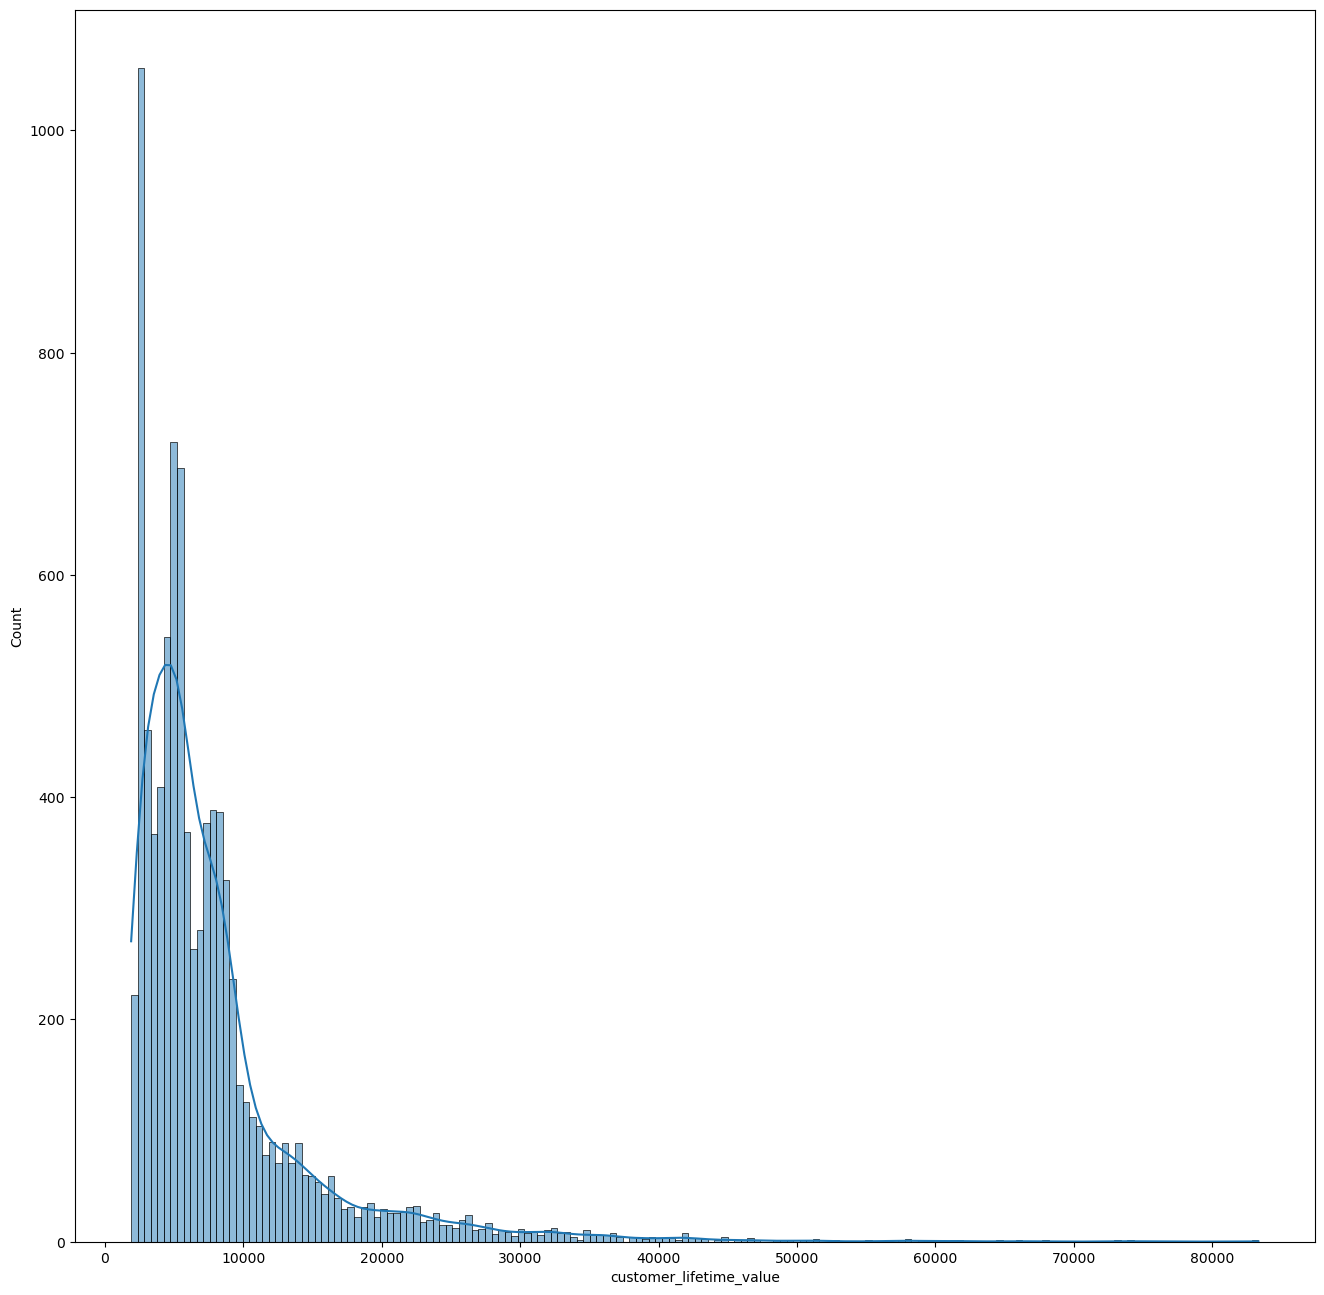

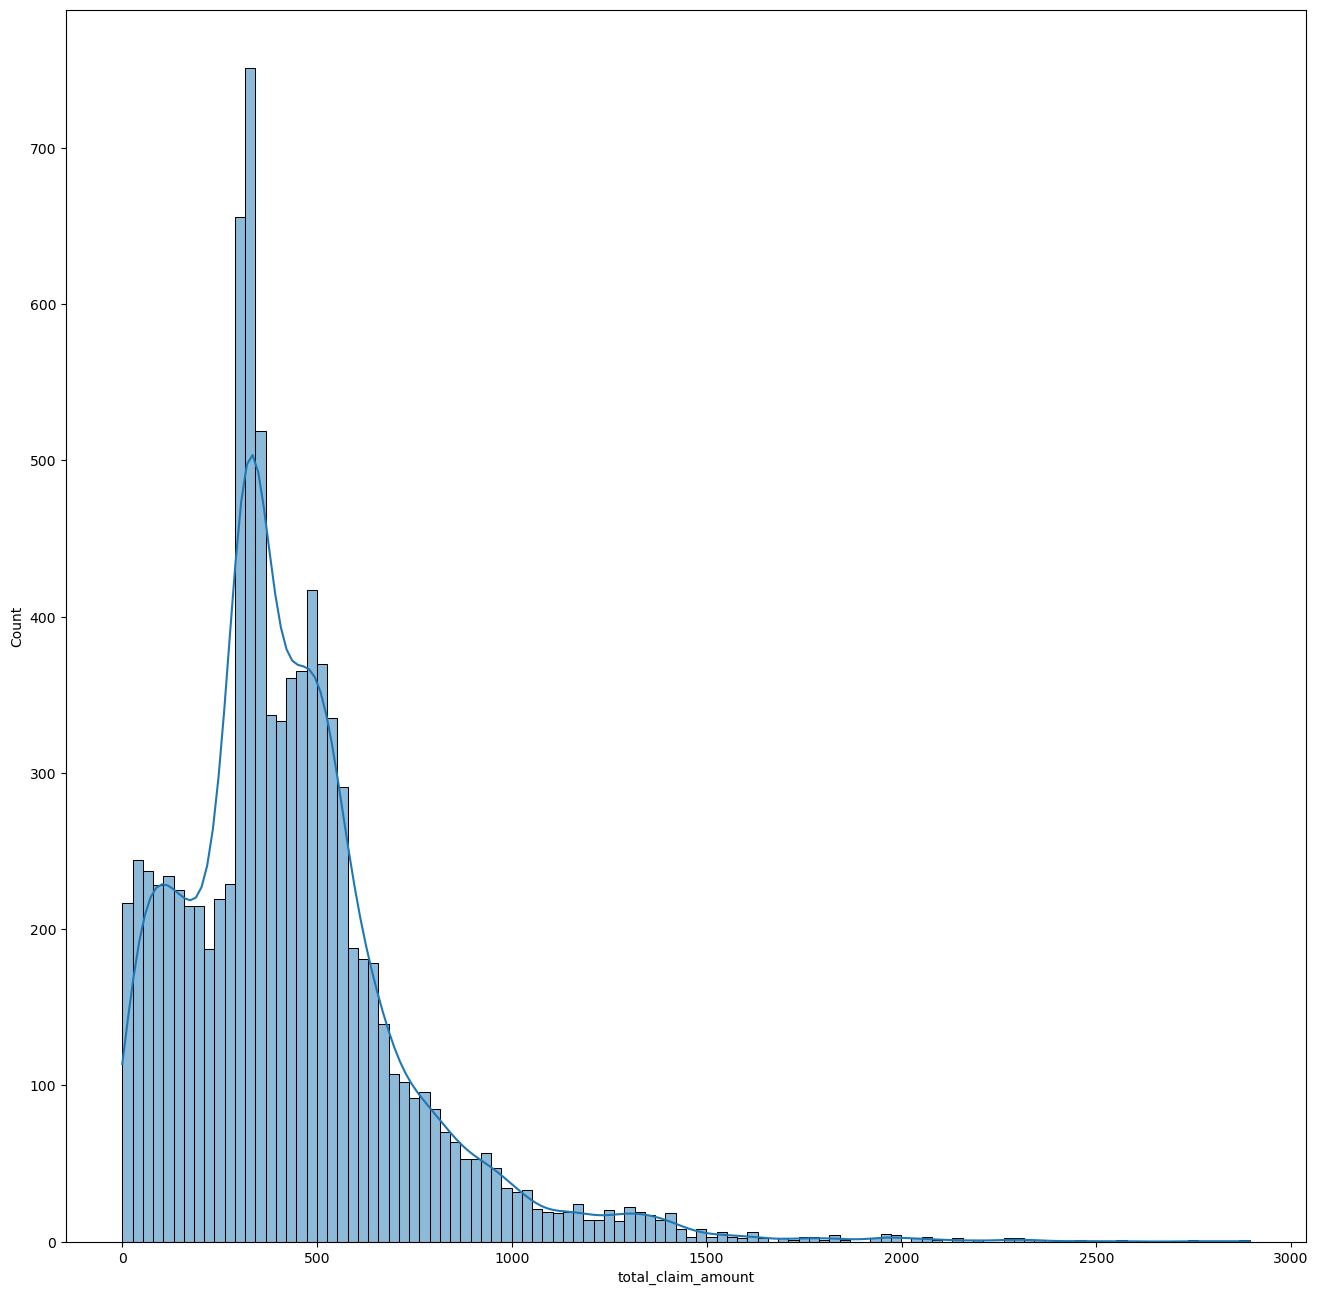

In [19]:
# function to plot continuous

def plot_continuous(df):
    for col in df.columns:
        plt.figure(figsize=(16, 16))
        sns.histplot(df[col], kde=True)
        plt.show()

plot_continuous(continuous_df)

Looking at these distributions we would need to apply transformations as they are skewed

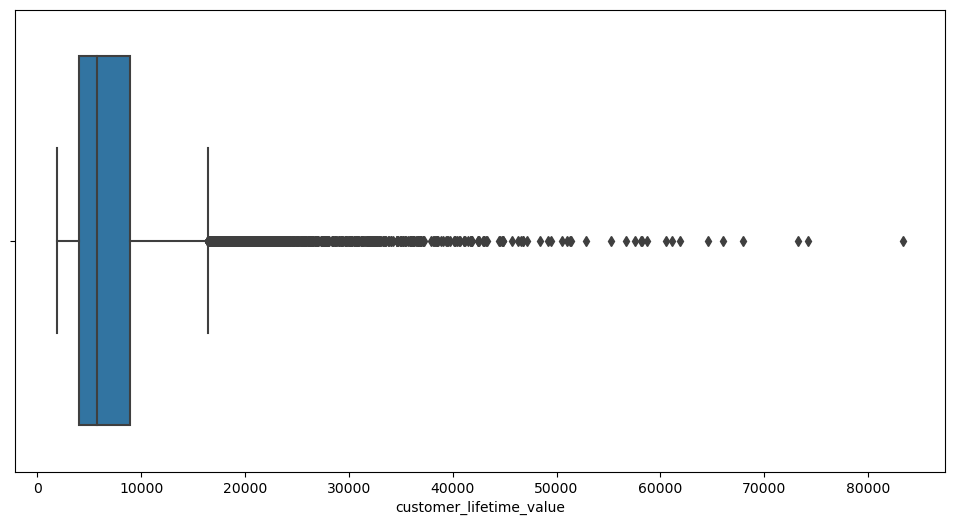

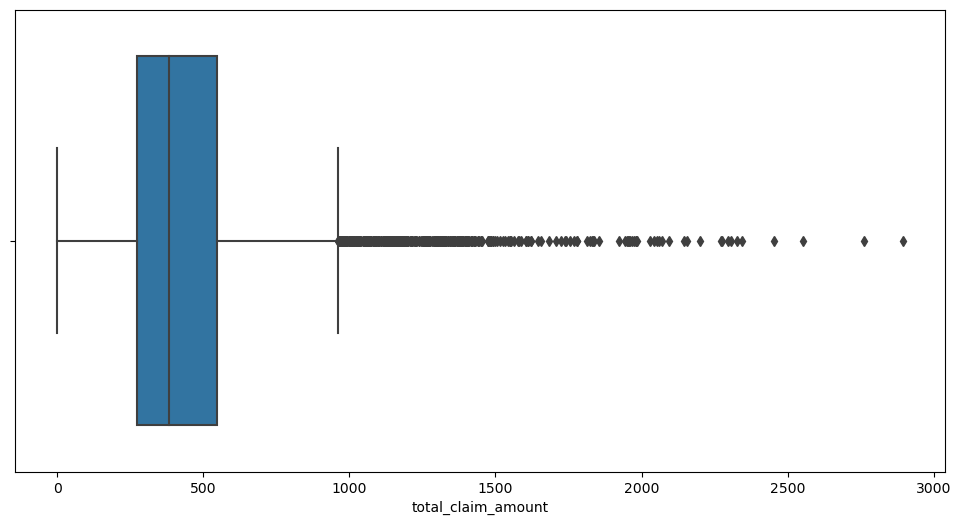

In [20]:
# boxplot function to look for outliers

def plot_box(df):
    for col in df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=df[col])
        plt.show()

plot_box(continuous_df)
